In [27]:
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stocks = ['NRG', 'VST', 'PEG', 'EXC']

In [3]:
start = dt.datetime.today() - dt.timedelta(365)

In [4]:
end = dt.datetime.today()

In [6]:
cl_price = pd.DataFrame()

In [7]:
for stock in stocks:
    cl_price[stock] = yf.download(stock, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [9]:
cl_price.head()

,NRG,VST,PEG,EXC
Date,,,,
2019-09-11,37.60,25.32,59.74,46.98
2019-09-12,37.29,25.61,59.30,46.16
2019-09-13,37.50,25.71,58.67,45.57
2019-09-16,38.01,26.02,58.67,45.68
2019-09-17,38.01,26.11,59.03,45.59


In [10]:
#filling NaN Values
cl_price.fillna(method='bfill', axis = 0, inplace=True)

In [11]:
#dropping Nan values
cl_price.dropna(axis=0, inplace=True)

In [23]:
daily_ret = cl_price.pct_change()
print('Daily Return\n',daily_ret.mean())
print('\n')
print('Daily Std\n',daily_ret.std())

Daily Return
 NRG   -0.000295
VST   -0.000854
PEG   -0.000223
EXC   -0.000618
dtype: float64


Daily Std
 NRG    0.029101
VST    0.030802
PEG    0.024694
EXC    0.030316
dtype: float64


In [25]:
#Rolling mean and standard deviation => simple moving average
daily_ret.rolling(20).mean().tail()
daily_ret.rolling(20).std().tail()

,NRG,VST,PEG,EXC
Date,,,,
2020-09-03,0.016702,0.019596,0.014768,0.018578
2020-09-04,0.017495,0.020520,0.014215,0.017472
2020-09-08,0.019003,0.020516,0.014208,0.017573
2020-09-09,0.019371,0.021730,0.015334,0.017553
2020-09-10,0.019956,0.021215,0.015257,0.017360


In [26]:
#Rolling mean and standard deviation => exponential moving average
daily_ret.ewm(20).mean().tail()
daily_ret.ewm(20).std().tail()

,NRG,VST,PEG,EXC
Date,,,,
2020-09-03,0.018272,0.021210,0.019452,0.019644
2020-09-04,0.018634,0.021502,0.019108,0.019206
2020-09-08,0.020276,0.021373,0.018647,0.019136
2020-09-09,0.020066,0.022170,0.019148,0.018752
2020-09-10,0.020498,0.021932,0.019297,0.018904


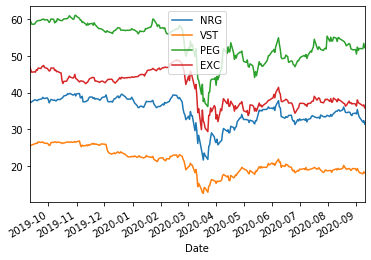

In [30]:
cl_price.plot();

In [31]:
#Standardization
cl_standard = (cl_price - cl_price.mean())/cl_price.std()

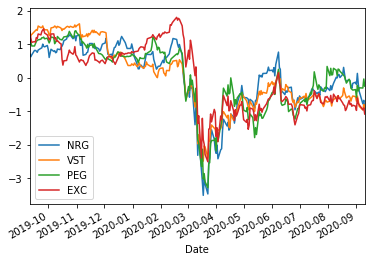

In [33]:
cl_standard.plot();

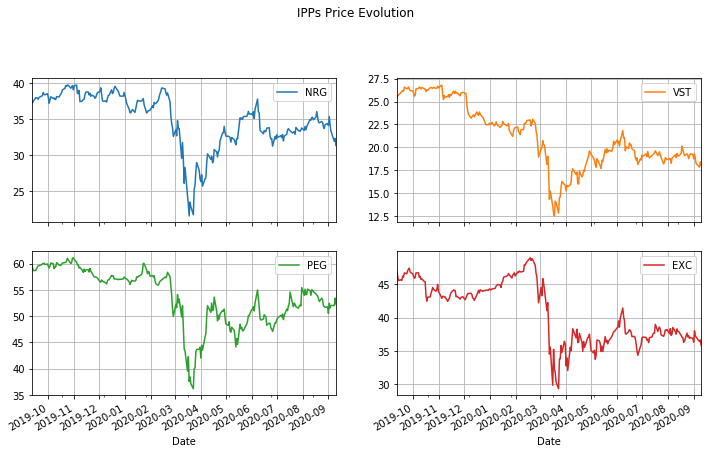

In [36]:
cl_price.plot(subplots=True, layout = (3,2), title = "IPPs Price Evolution", grid =True, figsize = (12,10));

<BarContainer object of 4 artists>

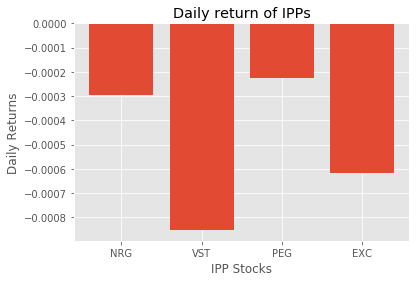

In [38]:
fig, ax = plt.subplots()
#plt.style.available
plt.style.use('ggplot')
ax.set(title = 'Daily return of IPPs', xlabel = 'IPP Stocks', ylabel = 'Daily Returns')
plt.bar(daily_ret.columns, daily_ret.mean())